In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [91]:
data = pd.read_excel('titanic.xls')
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data = data.dropna(axis=0) # Enléve les lignes sans ages
# data.head()
data.describe()


,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Il manque des données sur l’âge, deux options s’offrent à nous : 
- data.fillna(data['age'].mean()) : Nous modifions la réalité
- data.dropna(axis=0) : Supprimer les lignes mais moins de données

<Axes: ylabel='Frequency'>

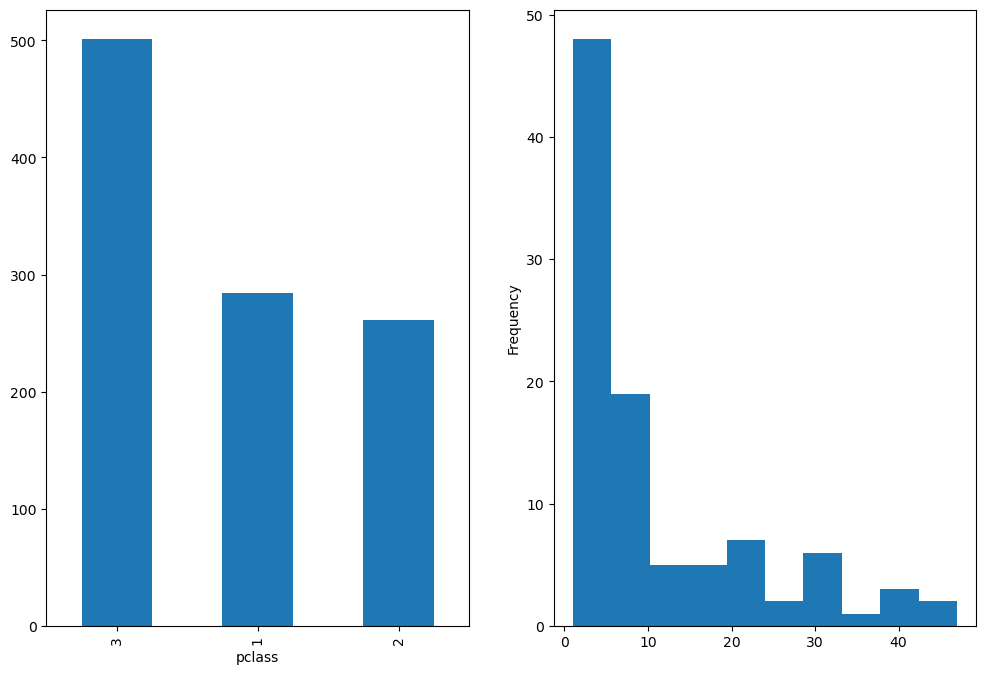

In [76]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
data['pclass'].value_counts().plot.bar()
plt.subplot(1, 2, 2)
data['age'].value_counts().plot.hist()


In [80]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

Manipulations de données

In [57]:
# data['age'] = Série
data['age'][0:10] # Indexing : Gauche la série, à droite, l’indexing sur le tableau numpy
data[data ['age'] < 18]['pclass'].value_counts() # Remplace directement dans le dataframe et les comptes


pclass
3    106
2     33
1     15
Name: count, dtype: int64

In [58]:
data[data['age'] < 18].groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

##   Iloc (index localisation) et loc (colonnes)

In [63]:
data.iloc[0:2, 0:4] # Sert à indexer le dataframe comme si nous étions sur une matrice pandas

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167


In [68]:
data.loc[0:4] # 4 lignes
data.loc[0:3, ['age', 'sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female
3,30.0000,male


Remplacer les ages du dataframe par 4 groupes : 
- 0 => < 20ans
- 1 => 20 - 30ans
- 2 => 30 - 40ans
- 3 => + 40 ans

In [11]:
data = pd.read_excel('titanic.xls')
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'sex', 'pclass', 'survived'], axis=1)
data = data.dropna(axis=0) # Enléve les lignes sans ages
# data.head()
data.describe()


,age
count,1046.000000
mean,29.881135
std,14.413500
min,0.166700
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [13]:
data.loc[data['age'] <= 20, 'age'] = 0
data.loc[(data['age'] > 20) & (data['age'] <= 30), 'age'] = 1
data.loc[(data['age'] > 30) & (data['age'] <= 40), 'age'] = 2
data.loc[data['age'] > 40, 'age'] = 3

data['age'].value_counts()

age
0.0    1046
Name: count, dtype: int64